 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sn

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
wr_data = Path('Resources/whale_returns.csv')
whale_returns = pd.read_csv(wr_data, index_col= 'Date', infer_datetime_format= True, parse_dates= True)

whale_returns.sort_index(inplace=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_returns = whale_returns.dropna()

whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
ar_data = Path('Resources/algo_returns.csv')
algo_returns = pd.read_csv(ar_data, index_col='Date', infer_datetime_format=True, parse_dates=True)

algo_returns.sort_index(inplace=True)
algo_returns.head(10)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [7]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_returns = algo_returns.dropna()

algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices
sp500_data = Path('Resources/sp500_history.csv')
sp500_history = pd.read_csv(sp500_data, index_col='Date', infer_datetime_format=True, parse_dates=True)

sp500_history.sort_index(inplace=True)
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [10]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
sp500_history['Close'] = sp500_history['Close'].str.replace('$','')
sp500_history.head()


C:\Users\GSKri\AppData\Local\Temp/ipykernel_23192/317537692.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_history['Close'] = sp500_history['Close'].str.replace('$','')


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [12]:
sp500_history['Close'] = sp500_history['Close'].astype(float)
sp500_history.dtypes

Close    float64
dtype: object

In [13]:
# Calculate Daily Returns
daily_returns = sp500_history.pct_change()

daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [14]:
# Drop nulls
daily_returns = daily_returns.dropna()

daily_returns.head()


,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [15]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns = daily_returns.rename(columns = {"Close":"S&P500"})
daily_returns.head()

,S&P500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_df = pd.concat([whale_returns, algo_returns, daily_returns], axis="columns", join="inner")
all_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

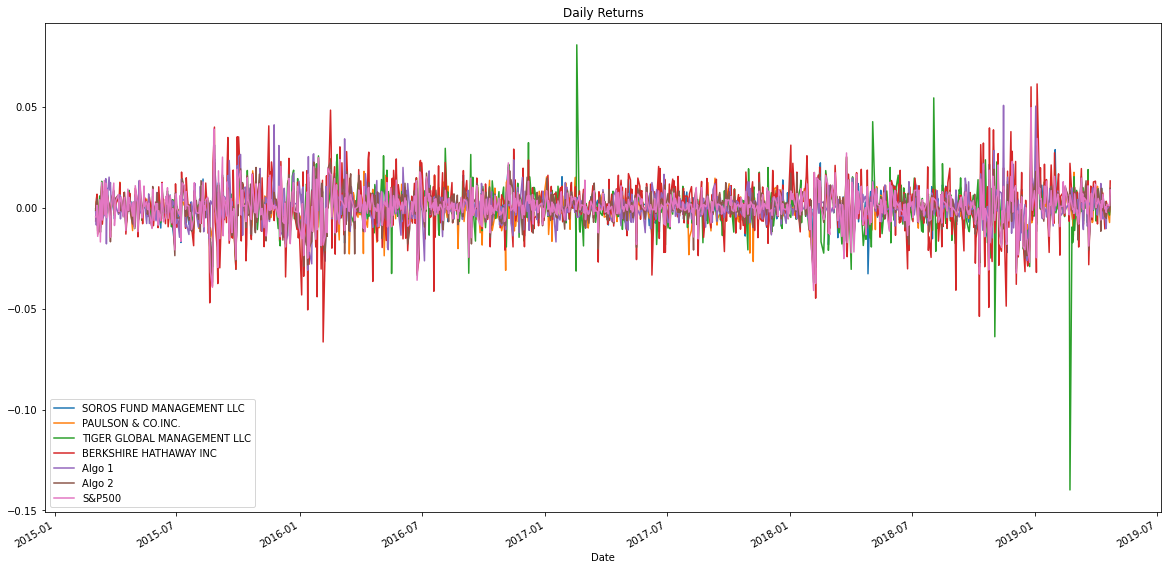

In [17]:
# Plot daily returns of all portfolios
all_df.plot(figsize=(20,10), title="Daily Returns")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

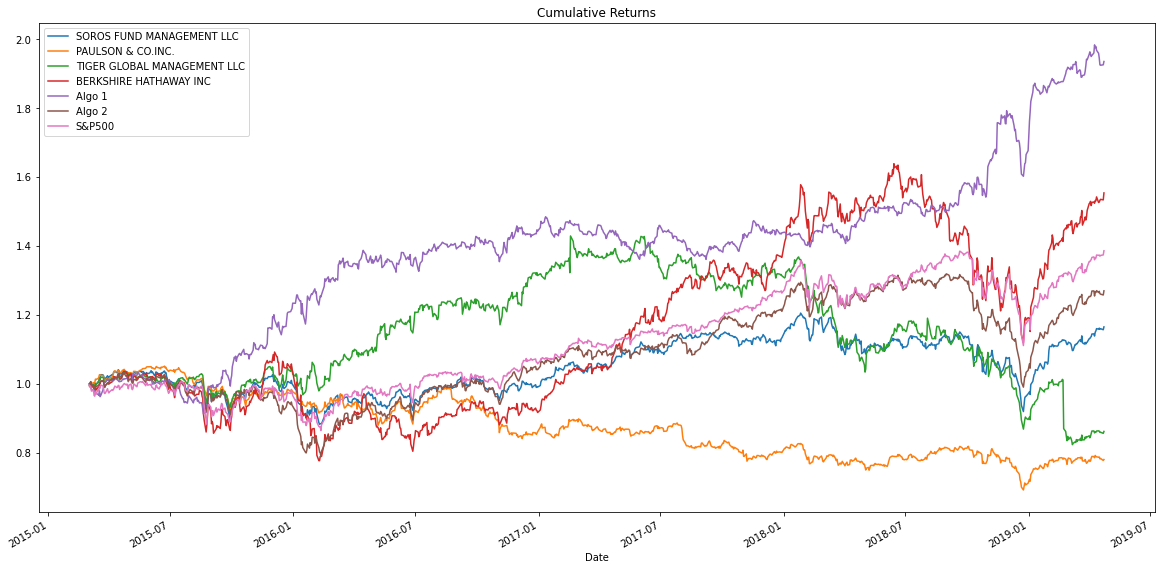

In [18]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_df).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10), title="Cumulative Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Box Plot'}>

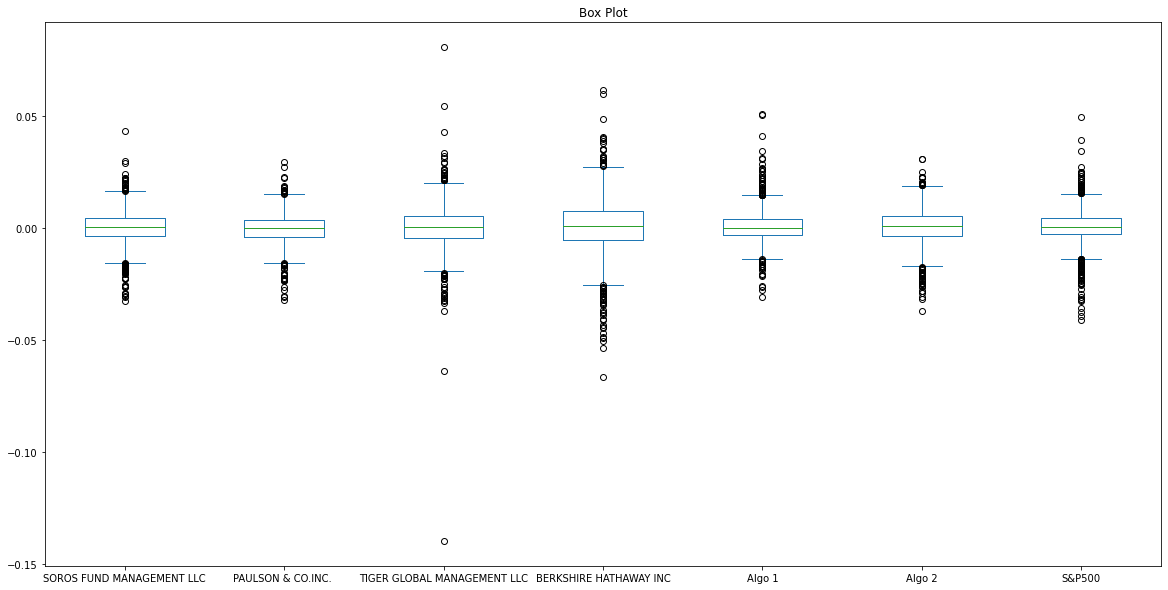

In [19]:
# Box plot to visually show risk
all_df.plot.box(figsize=(20,10), title="Box Plot")

### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios
all_df.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P500                         0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [21]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = all_df["S&P500"].std()

# Determine which portfolios are riskier than the S&P 500
all_df.std() > sp500_std

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P500                         False
dtype: bool

### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = all_df.std() * np.sqrt(252)
annual_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P500                         0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling STD'}, xlabel='Date'>

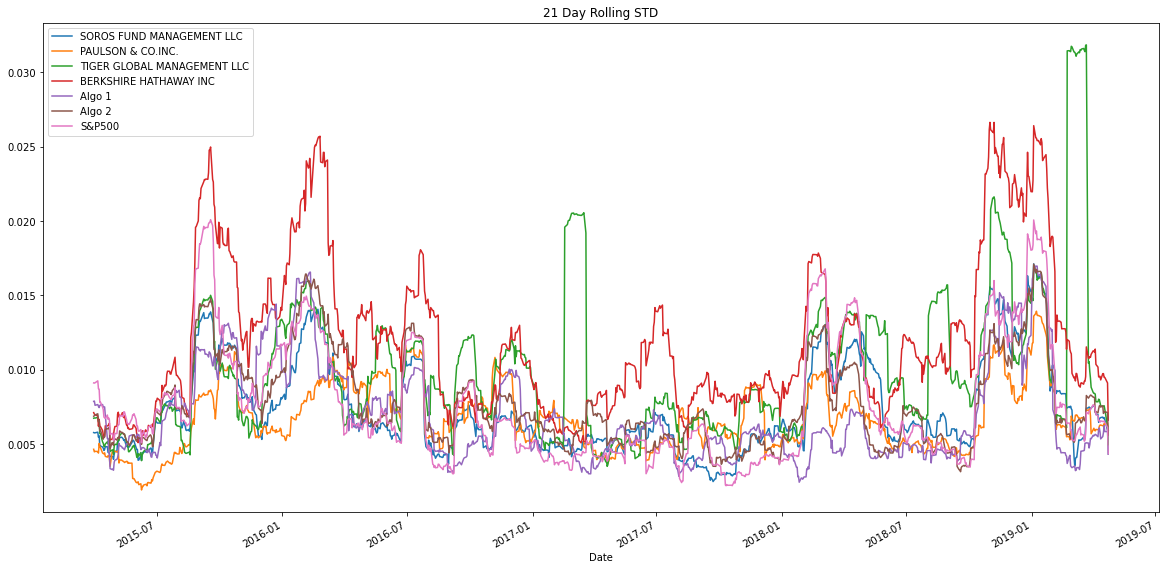

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_rolling_std = all_df.rolling(window=21).std()
# Plot the rolling standard deviation
all_rolling_std.plot(figsize=(20,10), title= "21 Day Rolling STD")


### Calculate and plot the correlation

<AxesSubplot:>

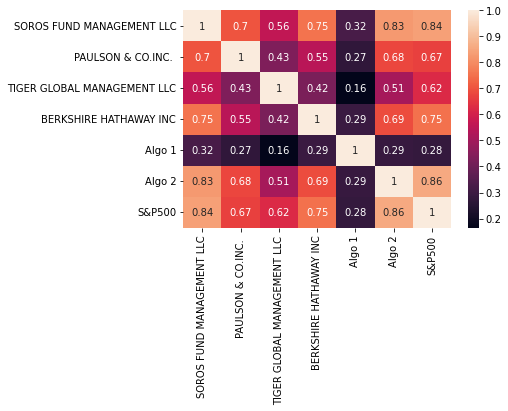

In [24]:
# Calculate the correlation
corr_df = all_df.corr()
# Display de correlation matrix
sn.heatmap(corr_df, annot=True)

In [25]:
#This is my tutor showing off lol
corr_df.style.background_gradient()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'BERKSHIRE HATHAWAY INC'}, xlabel='Date'>

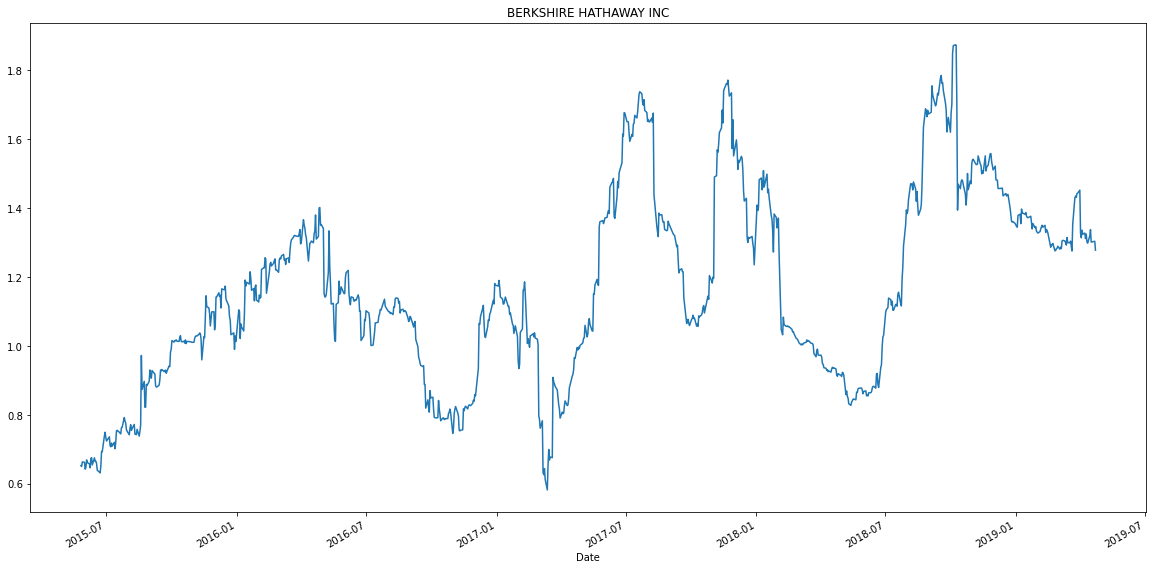

In [26]:
# Calculate covariance of a single portfolio
covariance_BH = all_df["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(all_df["S&P500"])

# Calculate variance of S&P 500
variance_sp = all_df["S&P500"].rolling(window=60).var()

# Computing beta
beta_BH = covariance_BH / variance_sp

# Plot beta trend
beta_BH.plot(figsize=(20,10), title="BERKSHIRE HATHAWAY INC")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'Exponentially Weighted Average'}, xlabel='Date'>

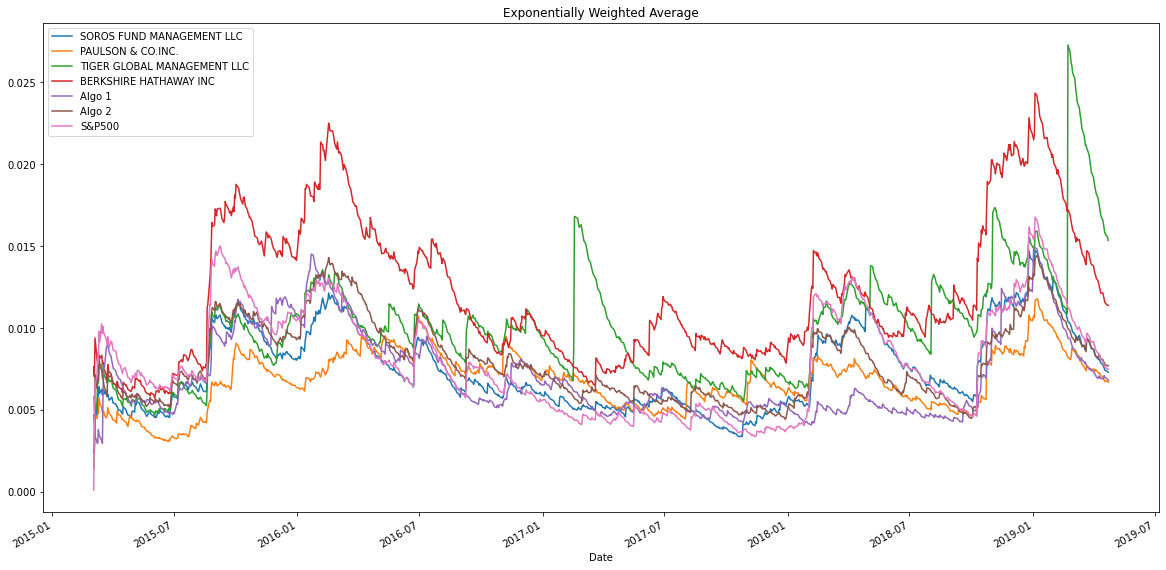

In [27]:
# Use `ewm` to calculate the rolling window
all_df.ewm(halflife=21).std().plot(figsize=(20,10), title="Exponentially Weighted Average")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [28]:
# Annualized Sharpe Ratios
sharpe_ratios = (all_df.mean() * 252) / (all_df.std()* np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P500                         0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

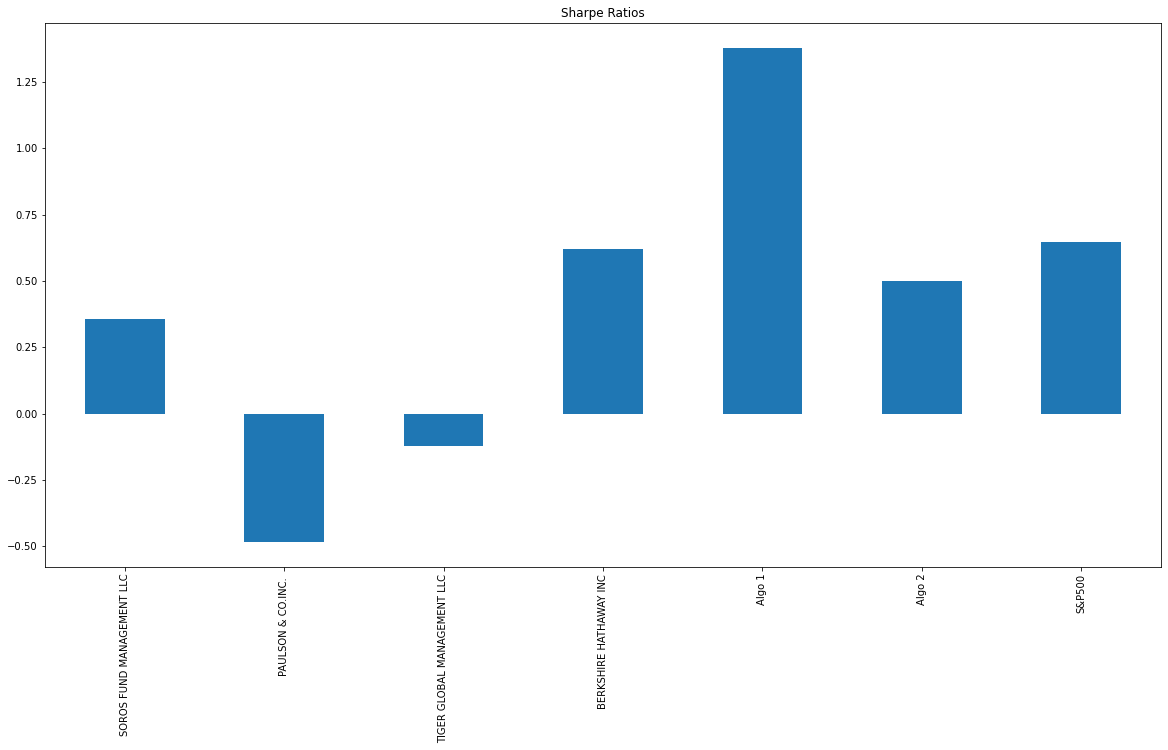

In [29]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(figsize=(20,10), title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

The algorithmic strategies 1 & 2 outperformed all three whale portfolios but only algorithmic strategies 1 outperformed the S&P500.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [30]:
#Beginning Imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sn

%matplotlib inline

In [31]:
# Reading data from 1st stock
appl_csv = Path('Resources/aapl_historical.csv')
appl_read = pd.read_csv(appl_csv)

appl_read.head()


,Symbol,Trade DATE,NOCP
0,AAPL,5/9/2019,200.72
1,AAPL,5/8/2019,202.90
2,AAPL,5/7/2019,202.86
3,AAPL,5/6/2019,208.48
4,AAPL,5/3/2019,211.75


In [32]:
appl_read = pd.read_csv(appl_csv, index_col= 'Trade DATE', infer_datetime_format=True, parse_dates=True)

appl_read.sort_index(inplace=True)
appl_read.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [33]:
# Reading data from 2nd stock
cost_csv = Path('Resources/cost_historical.csv')
cost_read = pd.read_csv(cost_csv, index_col= "Trade DATE", infer_datetime_format=True, parse_dates=True)

cost_read.sort_index(inplace=True)
cost_read.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [34]:
# Reading data from 3rd stock
goog_csv = Path('Resources/goog_historical.csv')
goog_read = pd.read_csv(goog_csv, index_col= "Trade DATE", infer_datetime_format=True, parse_dates=True)

goog_read.sort_index(inplace=True)
goog_read.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [35]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([appl_read, cost_read, goog_read], axis='columns', join="inner")

combined_df = combined_df.drop(columns=["Symbol"])
combined_df.head()

,NOCP,NOCP,NOCP
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [36]:
# Reset Date index
combined_df.sort_index(inplace=True)
combined_df.head()

,NOCP,NOCP,NOCP
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [37]:
# Reorganize portfolio data by having a column per symbol
combined_df.columns = ['APPL', 'COST', 'GOOG']

combined_df.head()

,APPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [38]:
# Calculate daily returns
daily_returns = combined_df.pct_change()

# Drop NAs
daily_returns = daily_returns.dropna()

# Display sample data
daily_returns.head()


,APPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [39]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_df = daily_returns.dot(weights)

# Display sample data
portfolio_df.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [40]:
# Join your returns DataFrame to the original returns DataFrame
all_combined_df = pd.concat([combined_df, portfolio_df], axis="columns", join="inner")

columns = ['APPL', 'COST', 'GOOG', 'Daily Returns']
all_combined_df.columns = columns

all_combined_df.head()

,APPL,COST,GOOG,Daily Returns
Trade DATE,,,,
2018-05-14,188.15,195.88,1100.20,0.000015
2018-05-15,186.44,195.48,1079.23,-0.010064
2018-05-16,188.18,198.71,1081.77,0.009403
2018-05-17,186.99,199.60,1078.59,-0.001595
2018-05-18,186.31,198.96,1066.36,-0.006061


In [41]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_combined_df = all_combined_df.dropna()
all_combined_df.tail()

,APPL,COST,GOOG,Daily Returns
Trade DATE,,,,
2019-05-03,211.75,244.62,1185.40,0.013329
2019-05-06,208.48,244.23,1189.39,-0.004557
2019-05-07,202.86,240.18,1174.10,-0.018798
2019-05-08,202.90,241.34,1166.27,-0.000547
2019-05-09,200.72,243.47,1162.38,-0.001751


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [42]:
# Calculate the annualized `std`
all_combined_std = all_combined_df.std()
all_combined_std.round(2)

APPL             21.48
COST             14.37
GOOG             67.94
Daily Returns     0.01
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling STD 21-Day Window'}, xlabel='Trade DATE'>

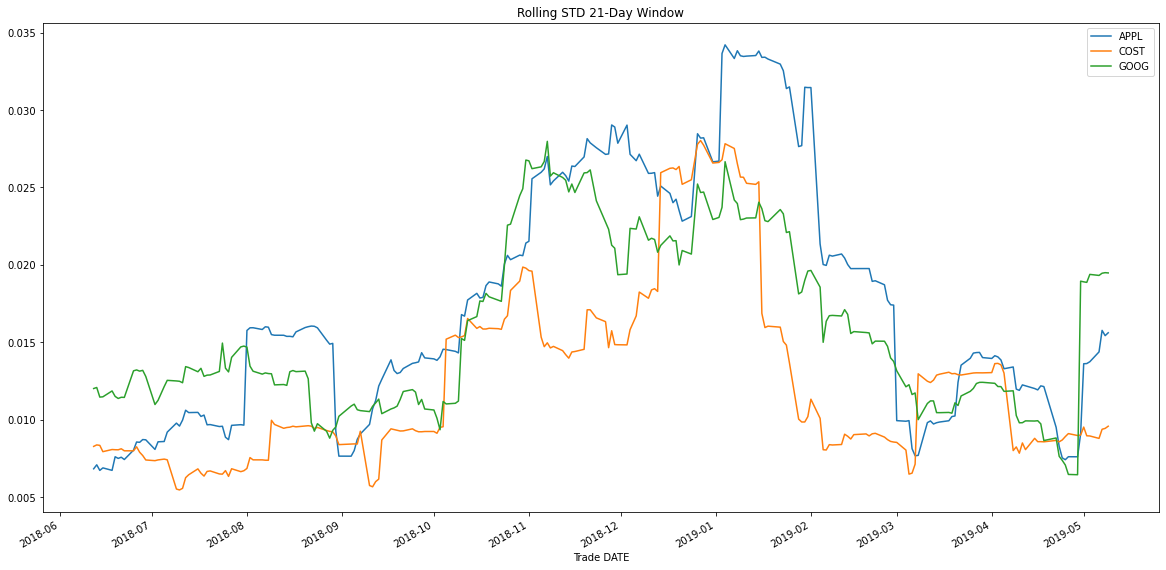

In [43]:
# Calculate rolling standard deviation
rolling_std = daily_returns.rolling(window=21).std()

# Plot rolling standard deviation
rolling_std.plot(figsize=(20,10), title="Rolling STD 21-Day Window")



### Calculate and plot the correlation

<AxesSubplot:title={'center':'Correlation Chart'}>

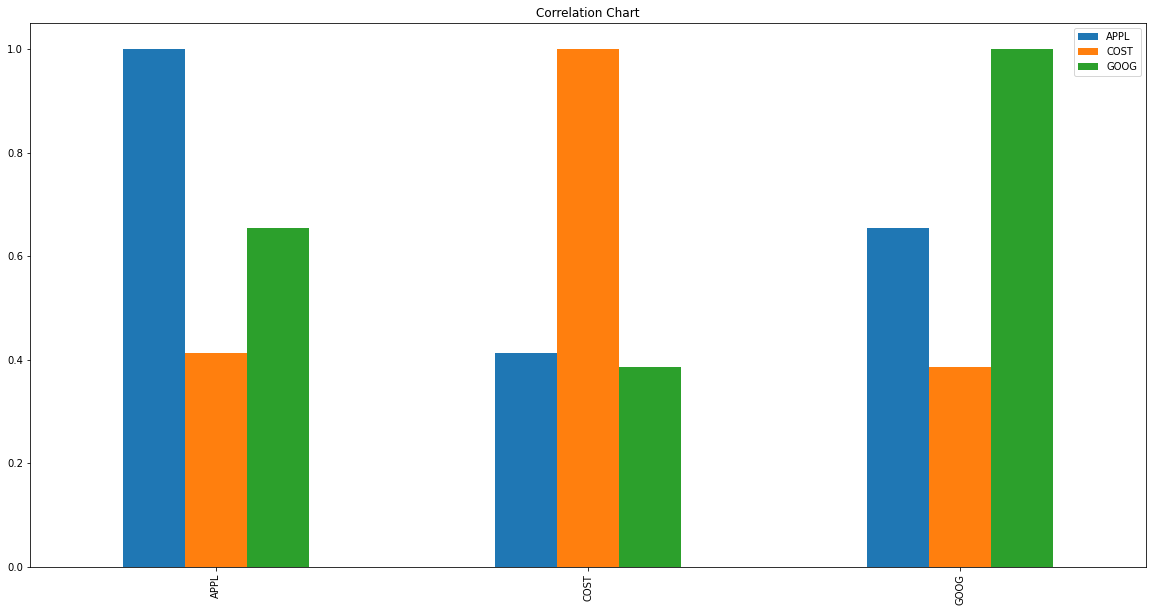

In [44]:
# Calculate and plot the correlation
correlation = daily_returns.corr()
correlation.plot.bar(figsize=(20,10), title= "Correlation Chart")

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta: APPLE to S&P500'}>

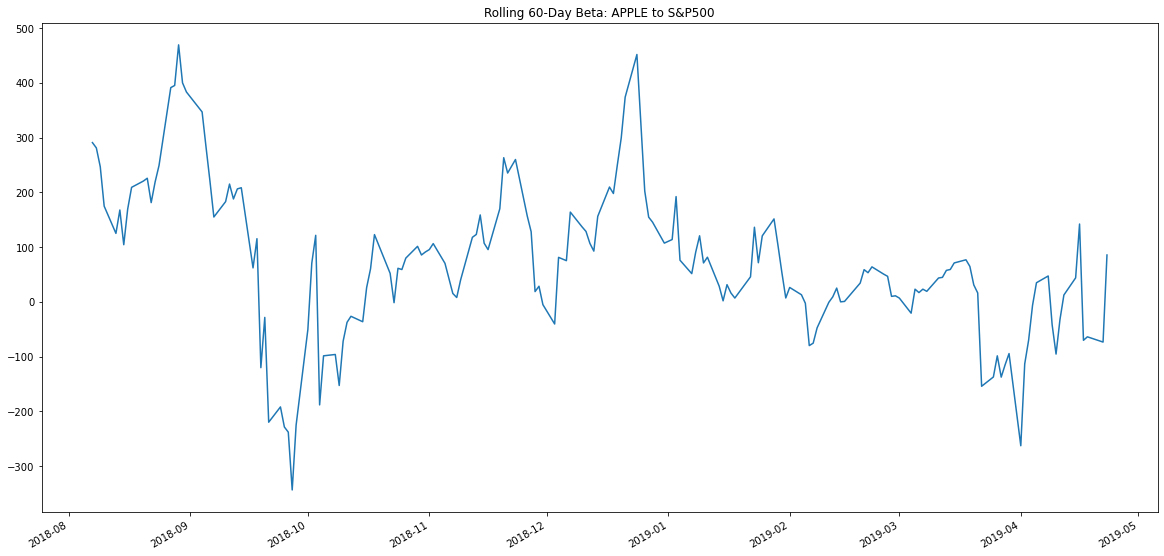

In [45]:
# Calculate and plot Beta
covariance_appl = all_combined_df["APPL"].rolling(window=60).cov(all_df["S&P500"])

variance_sp = all_df["S&P500"].rolling(window=60).var()

beta_appl = covariance_appl / variance_sp

# Plot beta trend
beta_appl.plot(figsize=(20,10), title= "Rolling 60-Day Beta: APPLE to S&P500")

<AxesSubplot:title={'center':'Rolling 60-Day Beta: COSTCO to S&P500'}>

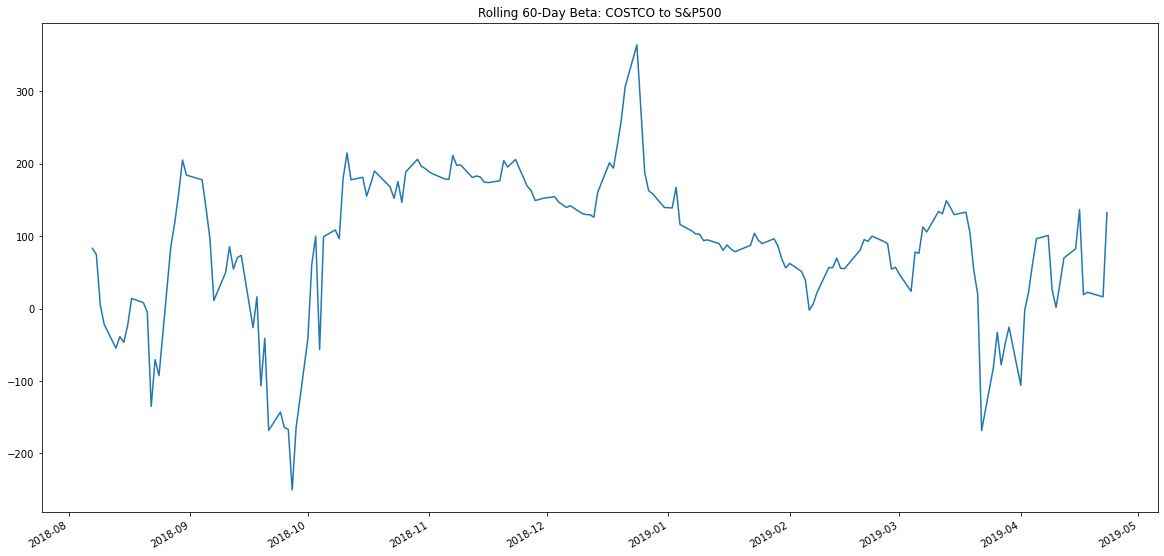

In [46]:
# Calculate and plot Beta
covariance_cost = all_combined_df["COST"].rolling(window=60).cov(all_df["S&P500"])

variance_sp = all_df["S&P500"].rolling(window=60).var()

beta_cost = covariance_cost / variance_sp

# Plot beta trend
beta_cost.plot(figsize=(20,10), title= "Rolling 60-Day Beta: COSTCO to S&P500")

<AxesSubplot:title={'center':'Rolling 60-Day Beta: GOOGLE to S&P500'}>

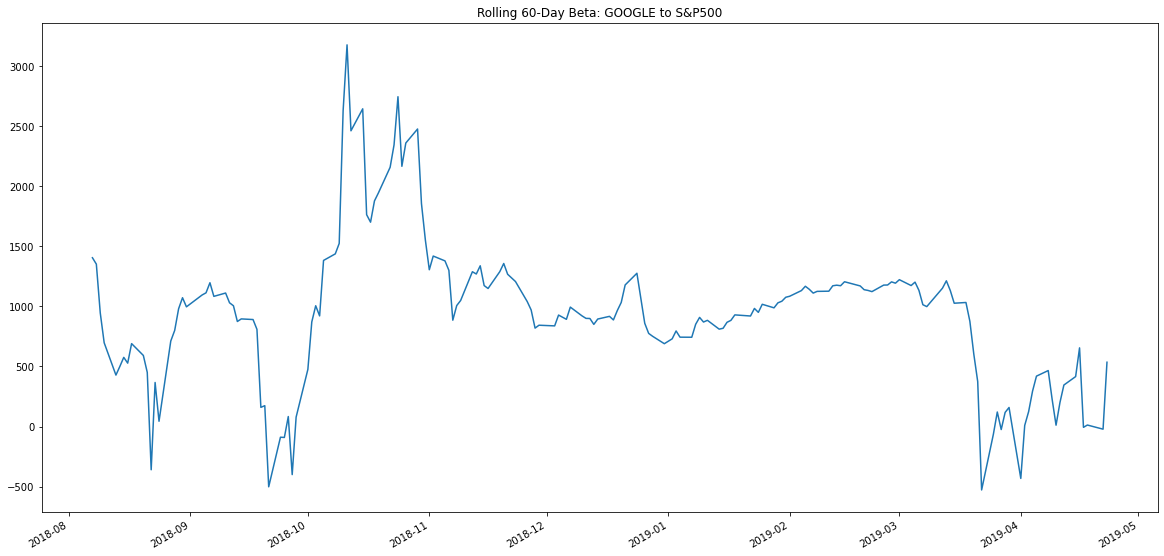

In [47]:
# Calculate and plot Beta
covariance_goog = all_combined_df["GOOG"].rolling(window=60).cov(all_df["S&P500"])

variance_sp = all_df["S&P500"].rolling(window=60).var()

beta_goog = covariance_goog / variance_sp

# Plot beta trend
beta_goog.plot(figsize=(20,10), title= "Rolling 60-Day Beta: GOOGLE to S&P500")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [48]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios = (daily_returns.mean() * 252) / (daily_returns.std()* np.sqrt(252))
sharpe_ratios.round(2)

APPL    0.36
COST    1.16
GOOG    0.35
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

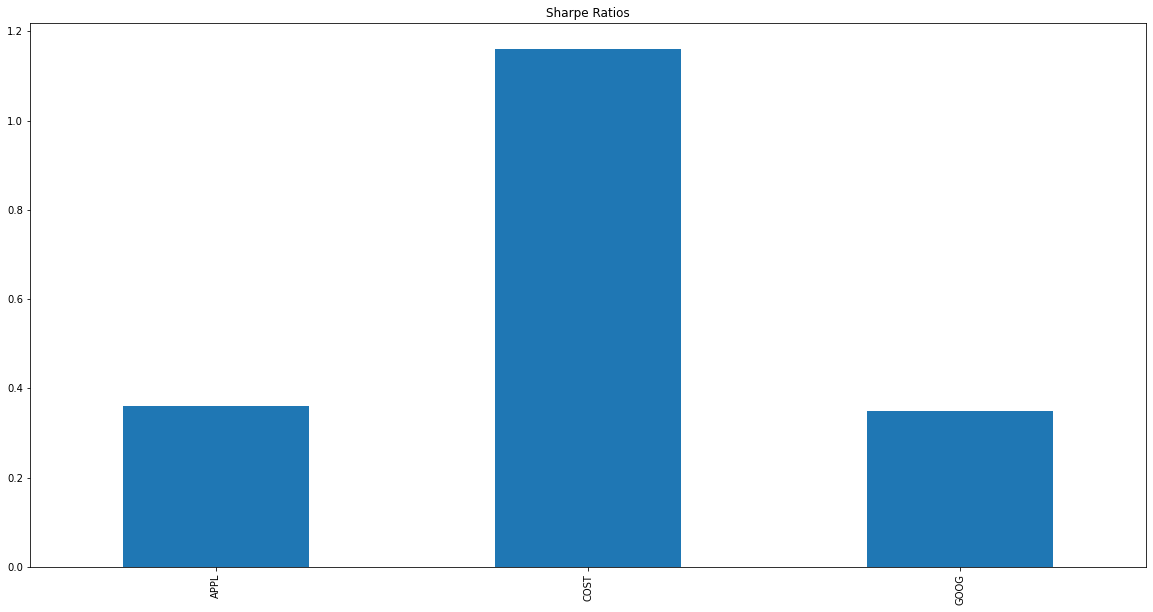

In [49]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(figsize=(20,10), title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

This portfolio does well with Costco (COST) signifcantly outperfoming other stocks within the portfolio.